# Lesson 8

Use the tips.csv dataset to find the mean tips broken down by sex. Build a histogram that overlays the males and females tips and discuss what is found

In [2]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
tips=Table.read_table("tips.csv")
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
male_tips=np.mean(tips.where('sex',are.equal_to('Male')).column('tip'))
female_tips=np.mean(tips.where('sex',are.equal_to('Female')).column('tip'))
print('Male average tip:', male_tips)
print('Female average tip:', female_tips)

Male average tip: 3.0896178343949043
Female average tip: 2.8334482758620685


C:\Users\C20Ben.Thompson\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


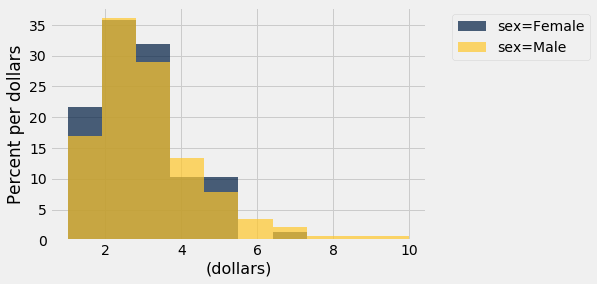

In [5]:
tips.hist('tip', unit='dollars', group='sex')

Remake the histogram but using time instead of sex

C:\Users\C20Ben.Thompson\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


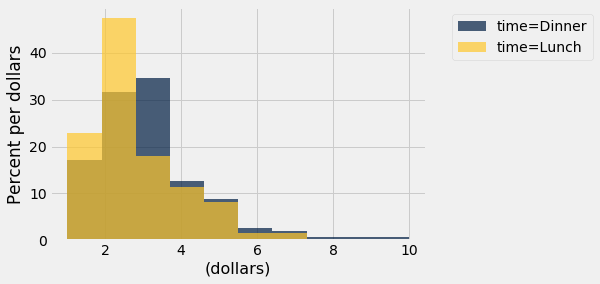

In [6]:
tips.hist('tip', unit='dollars', group='time')

Create a function called weekday_to_num. This function inputs a string denoting day of
the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues =
2, … Sun = 7).

In [7]:
def weekday_to_num(day):
    if day=='Mon':
        return 1
    if day=='Tues':
        return 2
    if day=='Wed':
        return 3
    if day=='Thur':
        return 4
    if day=='Fri':
        return 5
    if day=='Sat':
        return 6
    if day=='Sun':
        return 7

In [8]:
weekday_to_num('Mon')

1

Use this function to make a new column of tips called weekday_num

In [9]:
tips.with_column(
    'weekday_num', tips.apply(weekday_to_num, 'day')
)

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


Create a function called est_tip. The goal of this function is to predict tip amount
based on the value of the bill (total_bill). To do this, we will look at “nearby” values
(i.e. tip, where the value of total_bill is near the value of interest.)

In [10]:
def est_tip(bill, window):
    pre_tip=np.mean(tips.where('total_bill',are.between(bill - window, bill + window)).column('tip'))
    return pre_tip

In [11]:
est_tip(20, 1)

3.143333333333333

Apply this function to the total_bill column of tips and include the result as a new
column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip
amount.

In [19]:
tips_with_prediction=tips.with_column(
    'predicted_tips', tips.apply(est_tip, 1, 'total_bill')
)
tips_with_prediction

total_bill,tip,sex,smoker,day,time,size,predicted_tips
16.99,1.01,Female,No,Sun,Dinner,2,2.28031
10.34,1.66,Male,No,Sun,Dinner,3,1.859
21.01,3.5,Male,No,Sun,Dinner,3,2.58217
23.68,3.31,Male,No,Sun,Dinner,2,2.67578
24.59,3.61,Female,No,Sun,Dinner,4,2.71698
25.29,4.71,Male,No,Sun,Dinner,4,2.75906
8.77,2,Male,No,Sun,Dinner,2,1.81067
26.88,3.12,Male,No,Sun,Dinner,4,2.75906
15.04,1.96,Male,No,Sun,Dinner,2,2.20752
14.78,3.23,Male,No,Sun,Dinner,2,2.28031


In [13]:
cut_tips=tips_with_prediction.select('total_bill','tip','predicted_tips')
cut_tips

total_bill,tip,predicted_tips
16.99,1.01,2.28031
10.34,1.66,1.859
21.01,3.5,2.58217
23.68,3.31,2.67578
24.59,3.61,2.71698
25.29,4.71,2.75906
8.77,2,1.81067
26.88,3.12,2.75906
15.04,1.96,2.20752
14.78,3.23,2.28031


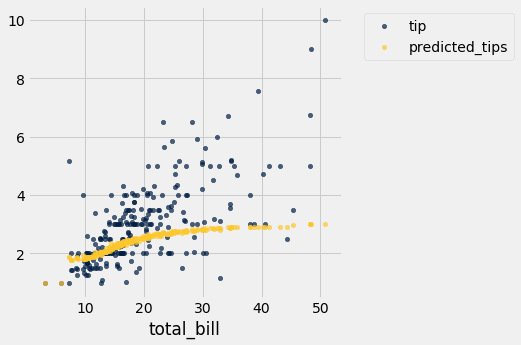

In [15]:
cut_tips.scatter('total_bill')